In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [11]:
import os
import glob

path = "./original"
person = glob.glob(path+"/person" + '/*')
wildboar = glob.glob(path+"/wildboar"+'/*')
waterdeer = glob.glob(path+"/waterdeer"+'/*')


def rename(files):

  if 'person' in files[0]:
     for i,f in enumerate(files):
         os.rename(f, os.path.join(path+"/person", 'person_' + '{0:03d}.jpg'.format(i)))
     person = glob.glob(path+"/person" + '/*')    
     print("person {}번째 이미지까지 성공".format(i+1))

  elif 'wildboar' in files[0]:
     for i,f in enumerate(files):
         os.rename(f, os.path.join(path+"/wildboar", 'wildboar_' + '{0:03d}.jpg'.format(i)))
     wildboar = glob.glob(path+"/wildboar"+'/*')
     print("wildboar {}번째 이미지까지 성공".format(i+1))

  elif 'waterdeer' in files[0]:
     for i,f in enumerate(files):
         os.rename(f, os.path.join(path+"/waterdeer", 'waterdeer' + '{0:03d}.jpg'.format(i)))
     waterdeer = glob.glob(path+"/waterdeer"+'/*')
     print("waterdeer {}번째 이미지까지 성공".format(i+1))

In [12]:
rename(person)
rename(wildboar)
rename(waterdeer)

person 207번째 이미지까지 성공
wildboar 165번째 이미지까지 성공
waterdeer 220번째 이미지까지 성공


In [24]:
person = sorted(glob.glob(path+"/person" + '/*'))
wildboar = sorted(glob.glob(path+"/wildboar"+'/*'))
waterdeer = sorted(glob.glob(path+"/waterdeer"+'/*'))

print('person 이미지 개수: {}\nwildboar 이미지 개수: {}\nwaterdeer 이미지 개수: {}'.format(len(person), len(wildboar), len(waterdeer)))

person 이미지 개수: 207
wildboar 이미지 개수: 165
waterdeer 이미지 개수: 220


In [ ]:
#whole_sum = len(dolphin)+len(shark)+len(whale)

## 시각화

In [25]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import cv2
%matplotlib inline

In [26]:
def read_img(file_path):
    img_arr = cv2.imread(file_path)
    return cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)

In [29]:
import random
img_arrs = []
img_num = range(0,220)

for i in random.sample(img_num,3):
    
    img_arrs.append(read_img(person[i]))
    img_arrs.append(read_img(wildboar[i]))
    img_arrs.append(read_img(waterdeer[i]))

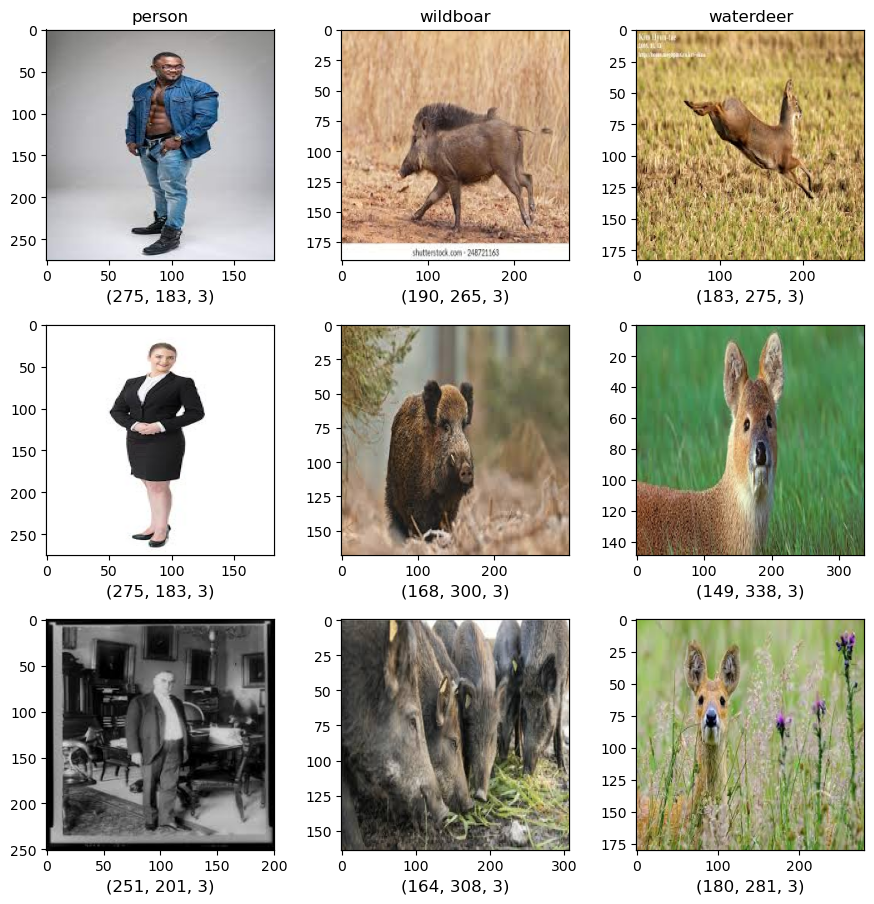

In [31]:
rows = 3 # 3개씩 샘플링 했으므로
columns = 3

# 그림판 설정
fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*3, rows*3))

# 각 판에 이미지 출력
for num in range(1, rows*columns+1): # 1번 부터 15번 까지
    
    fig.add_subplot(rows, columns, num) # 원하는 위치 번호(num)를 입력
    idx = num - 1 # 인덱스
    
    plt.imshow(img_arrs[idx], aspect='auto')
    plt.xlabel(f'{img_arrs[idx].shape}', fontsize=12)

fig.tight_layout() # 이미지 사이 간격 조정



# 제목 설정
cols = ['person', 'wildboar', 'waterdeer']

for folder_idx, ax in enumerate(axes[0]):
    ax.set_title(cols[folder_idx])

# xtick, ytick 제거
for idx, ax in enumerate(axes.flat):
    ax.set_xticks([])
    ax.set_yticks([])

## train, test split

In [32]:
path = "./original"
person = sorted(glob.glob(path+"/person" + '/*'))
wildboar = sorted(glob.glob(path+"/wildboar"+'/*'))
waterdeer = sorted(glob.glob(path+"/waterdeer"+'/*'))

print('person 이미지 개수: {}\nwildboar 이미지 개수: {}\nwaterdeer 이미지 개수: {}'.format(len(person), len(wildboar), len(waterdeer)))

person 이미지 개수: 207
wildboar 이미지 개수: 165
waterdeer 이미지 개수: 220


In [33]:
import math

person_test_count = round(len(person)*0.2)
wildboar_test_count = round(len(wildboar)*0.2)
waterdeer_test_count = round(len(waterdeer)*0.2)

print('person test파일에 들어갈 이미지 개수 : {}/{}'.format(person_test_count,len(person)))
print('wildboar test파일에 들어갈 이미지 개수 : {}/{}'.format(wildboar_test_count,len(wildboar)))
print('waterdeer test파일에 들어갈 이미지 개수 : {}/{}'.format(waterdeer_test_count,len(waterdeer)))

person test파일에 들어갈 이미지 개수 : 41/207
wildboar test파일에 들어갈 이미지 개수 : 33/165
waterdeer test파일에 들어갈 이미지 개수 : 44/220


In [34]:
import shutil
def split( img_list, test_count, train_path, test_path):
  
  test_files=[]
  for i in random.sample( img_list, test_count ):
    test_files.append(i)

  # 차집합으로 train/test 리스트 생성하기
  train_files = [x for x in img_list if x not in test_files]

  for k in train_files:
    shutil.copy(k, train_path)
  
  for c in test_files:
    shutil.copy(c, test_path)

  print('train 폴더 이미지 개수 : {}\ntest 폴더 이미지 개수 : {}'.format(len(glob.glob(train_path+'/*')),len(glob.glob(test_path+'/*'))))

In [35]:
person_train_path='./train/person'
person_test_path='./test/person'

wildboar_train_path='./train/wildboar'
wildboar_test_path='./test/wildboar'

waterdeer_train_path='./train/waterdeer'
waterdeer_test_path='./test/waterdeer'

split(person, person_test_count, person_train_path, person_test_path)
split(wildboar, wildboar_test_count, wildboar_train_path, wildboar_test_path)
split(waterdeer, waterdeer_test_count, waterdeer_train_path, waterdeer_test_path)

train 폴더 이미지 개수 : 167
test 폴더 이미지 개수 : 42
train 폴더 이미지 개수 : 133
test 폴더 이미지 개수 : 34
train 폴더 이미지 개수 : 177
test 폴더 이미지 개수 : 45


In [36]:
path = "./train"
person = glob.glob(path+"/person" + '/*')
wildboar = glob.glob(path+"/wildboar"+'/*')
waterdeer = glob.glob(path+"/waterdeer"+'/*')

rename(person)
rename(wildboar)
rename(waterdeer)

path = "./train"
person = glob.glob(path+"/person" + '/*')
wildboar = glob.glob(path+"/wildboar"+'/*')
waterdeer = glob.glob(path+"/waterdeer"+'/*')

print('각각 마지막 파일 이름 : ',os.path.basename(sorted(person)[-1]), os.path.basename(sorted(wildboar)[-1]), os.path.basename(sorted(waterdeer)[-1]))

person 167번째 이미지까지 성공
wildboar 133번째 이미지까지 성공
waterdeer 177번째 이미지까지 성공
각각 마지막 파일 이름 :  person_166.jpg wildboar_132.jpg waterdeer176.jpg


In [37]:
path = "./test"
person = glob.glob(path+"/person" + '/*')
wildboar = glob.glob(path+"/wildboar"+'/*')
waterdeer = glob.glob(path+"/waterdeer"+'/*')

rename(person)
rename(wildboar)
rename(waterdeer)

path = "./test"
person = glob.glob(path+"/person" + '/*')
wildboar = glob.glob(path+"/wildboar"+'/*')
waterdeer = glob.glob(path+"/waterdeer"+'/*')

print('각각 마지막 파일 이름 : ',os.path.basename(sorted(person)[-1]), os.path.basename(sorted(wildboar)[-1]), os.path.basename(sorted(waterdeer)[-1]))

person 42번째 이미지까지 성공
wildboar 34번째 이미지까지 성공
waterdeer 45번째 이미지까지 성공
각각 마지막 파일 이름 :  person_041.jpg wildboar_033.jpg waterdeer044.jpg
